In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import biosppy as bp

from ltbio.biosignals.modalities.ECG import ECG
from ltbio.biosignals.sources.BitalinoShort import BitalinoShort
from ltbio.biosignals.sources.HEM import HEM

In [2]:
path = 'C:\\Users\\Mariana\\PycharmProjects\\IT-LongTermBiosignals\\research_journal\\12-09-2022'

files = [file for file in os.listdir(path) if file.endswith('.parquet')]

In [3]:
df_all = pd.DataFrame()
for i in range(len(files)):
    df_all = pd.concat((df_all, pd.read_parquet(os.path.join(path, files[i]))), ignore_index=True)

In [22]:
big_freqs = df_all.loc[df_all['hrmax']> 199]

In [38]:
big_freqs[['id0', 'id1', 'patient']].drop_duplicates()

,id0,id1,patient
0,3,0,AMRL
8,4,1,AMRL
10,5,0,AMRL
30,8,1,AMRL
34,9,0,AMRL
...,...,...,...
3508,14,1,TSSVAS
3510,14,2,TSSVAS
3512,15,0,TSSVAS
3514,15,1,TSSVAS


In [39]:
460 - 393

67

In [8]:
for patient in ['AMRL']: #set(big_freqs['patient']):
    path_bit = f'C:\\Users\\Mariana\\Documents\\Epilepsy\\data\\{patient}\\Bitalino'
    path_hosp = f'C:\\Users\\Mariana\\Documents\\Epilepsy\\data\\{patient}\\ficheiros'
    pat_table = big_freqs.loc[big_freqs['patient']== patient]

In [9]:
pat_table = big_freqs.loc[(big_freqs['patient']== patient)]
id0_list = list(set(pat_table['id0']))

In [11]:
pat_table

,id0,id1,kSQI,pSQI,basSQI,hrmean,hrmax,hrvar,hrmed,source,duration,patient
44,11,1,2260.729130,0.738909,0.740694,117.409268,200.000000,1717.595373,117.878193,Bitalino,3599.597656,AMRL
46,11,2,1092.363734,0.808256,0.743365,111.768454,200.000000,1775.875541,107.334526,Bitalino,3599.699219,AMRL
239,39,0,242.908973,0.638226,0.172910,88.249701,199.480519,992.191915,76.800000,Hospital,3121.500000,AMRL
261,42,2,207.132094,0.488515,0.094100,86.716757,199.480519,397.565850,86.292135,Hospital,882.941406,AMRL


In [14]:
ecg_hosp = ECG(path_hosp, HEM)

     id0  id1        kSQI      pSQI  basSQI     hrmean       hrmax      hrvar  \
261   42    2  207.132094  0.488515  0.0941  86.716757  199.480519  397.56585   

         hrmed    source    duration patient  
261  86.292135  Hospital  882.941406    AMRL  


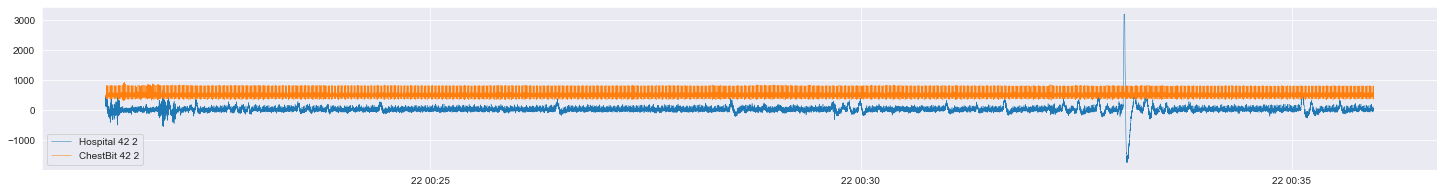

    id0  id1        kSQI      pSQI    basSQI      hrmean  hrmax        hrvar  \
44   11    1  2260.72913  0.738909  0.740694  117.409268  200.0  1717.595373   

         hrmed    source     duration patient  
44  117.878193  Bitalino  3599.597656    AMRL  


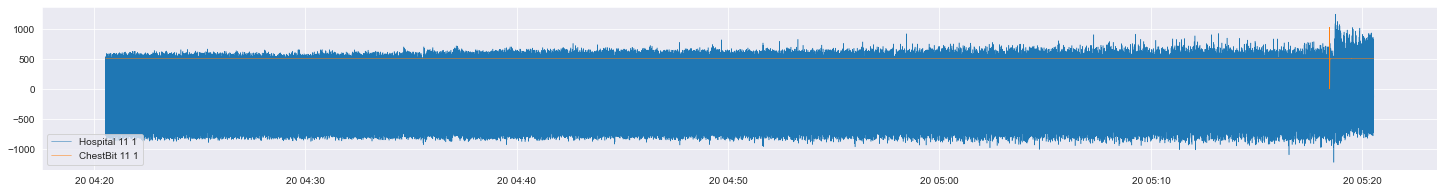

    id0  id1         kSQI      pSQI    basSQI      hrmean  hrmax        hrvar  \
46   11    2  1092.363734  0.808256  0.743365  111.768454  200.0  1775.875541   

         hrmed    source     duration patient  
46  107.334526  Bitalino  3599.699219    AMRL  


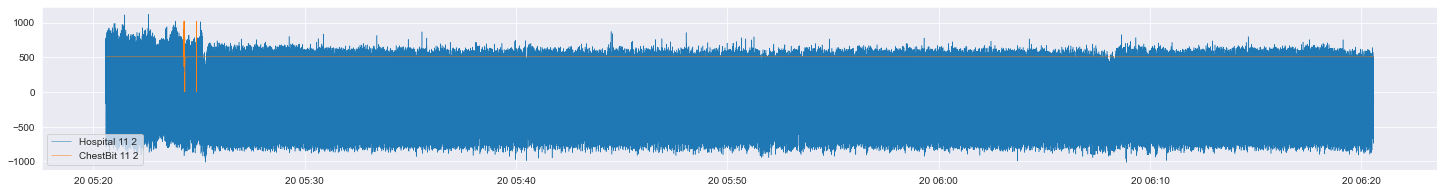

     id0  id1        kSQI      pSQI   basSQI     hrmean       hrmax  \
239   39    0  242.908973  0.638226  0.17291  88.249701  199.480519   

          hrvar  hrmed    source  duration patient  
239  992.191915   76.8  Hospital    3121.5    AMRL  


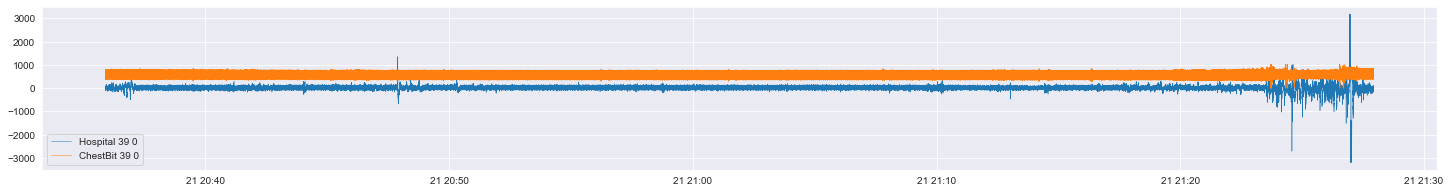

In [16]:
for id0 in id0_list:
    for id1 in pat_table.loc[pat_table['id0'] == id0]['id1']:
        id1 = int(id1)
        options = {'date1': ecg_hosp['ecg'].domain[id0].start_datetime, 'date2': ecg_hosp['ecg'].domain[id0].end_datetime}

        ecg_bit = ECG(path_bit, BitalinoShort, **options)
        crop_hosp = ecg_hosp['ecg'][ecg_bit.domain[id1]].to_array()
        crop_bit = ecg_bit[ecg_bit.domain[id1]].to_array()

        times_bit = pd.date_range(ecg_bit.domain[id1].start_datetime, ecg_bit.domain[id1].end_datetime, periods=len(crop_bit))
        times_hosp = pd.date_range(ecg_bit.domain[id1].start_datetime, ecg_bit.domain[id1].end_datetime, periods=len(crop_hosp))
        print(pat_table.loc[(pat_table['id0'].isin([id0]) & pat_table['id1'].isin([id1]))])
        # bp.signals.ecg.ecg(crop_bit, sampling_rate = ecg_bit.sampling_frequency, interactive=False)
        # bp.signals.ecg.ecg(crop_hosp, sampling_rate = ecg_hosp.sampling_frequency, interactive=False)
        plt.figure(figsize=(25, 3))
        plt.plot(times_hosp, crop_hosp, linewidth=0.5, label=f'Hospital {id0} {id1}')
        plt.plot(times_bit, crop_bit, linewidth=0.5, label=f'ChestBit {id0} {id1}')
        plt.legend(loc='lower left')
        plt.show()


26.151222285389427

In [35]:
sig = ecg_hosp['ecg'][ecg_hosp['ecg'].domain[id0[0]]].to_array()

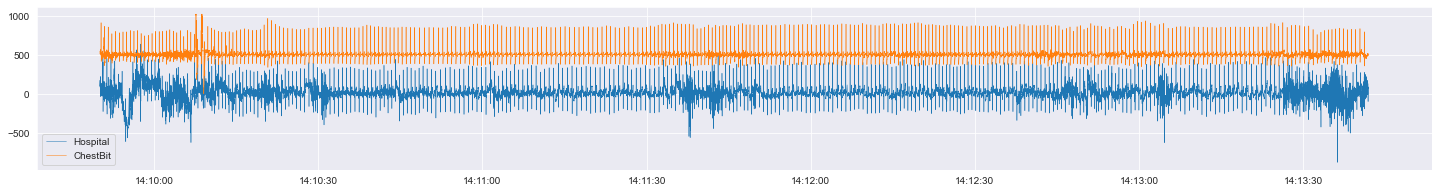

In [65]:
crop_hosp = ecg_hosp['ecg'][ecg_bit.domain[id1]].to_array()
crop_bit = ecg_bit[ecg_bit.domain[id1]].to_array()

times_bit = pd.date_range(ecg_bit.domain[id1].start_datetime, ecg_bit.domain[id1].end_datetime, periods=len(crop_bit))
times_hosp = pd.date_range(ecg_bit.domain[id1].start_datetime, ecg_bit.domain[id1].end_datetime, periods=len(crop_hosp))

plt.figure(figsize=(25, 3))
plt.plot(times_hosp, crop_hosp, linewidth=0.5, label='Hospital')
plt.plot(times_bit, crop_bit, linewidth=0.5, label='ChestBit')
plt.legend()

In [77]:
df_all['Source'] = df_all['source'].replace('Bitalino', 'ChestBit')

In [122]:
conditions1 = (df_all['patient'].isin(['DAJRD']) & df_all['id0'].isin([43]) & df_all['id1'].isin([0]))
conditions2 = ((df_all['id0'].isin([11]) & df_all['id1'].isin([1,2])) & df_all['patient'].isin(['AMRL']))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


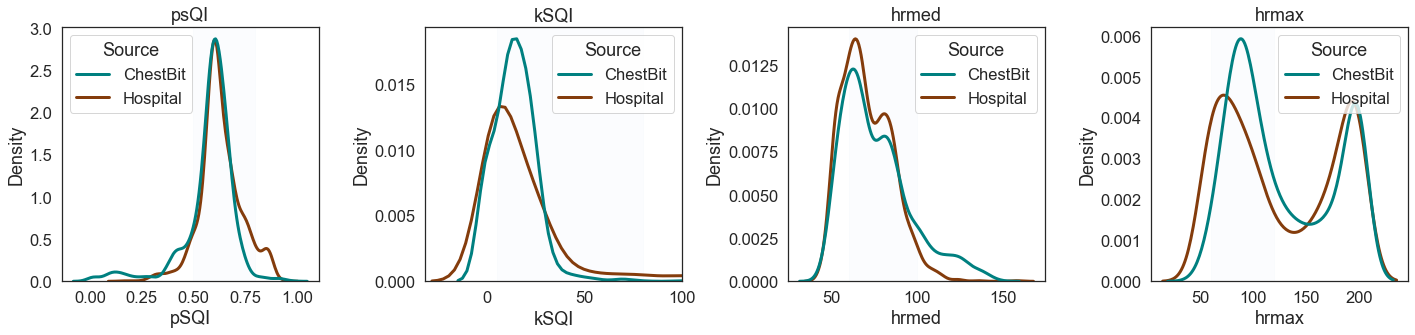

In [123]:



colors = {'teal':'teal', 'onset': '#843C0C', 'lightorange': '#F8CBAD', 'lightblue': '#A9D1ED'  , 'verylight': '#EDF4FC','darkblue': '#003399', }

sns.set(font_scale=1.5)
sns.set_style(style='white')
fig, axes = plt.subplots(1, 4, figsize=(20,5))

sns.set_palette(sns.color_palette(list(colors.values())))

df_all_plot = df_all.loc[~(conditions1 | conditions2)]

axes[0].set_title('psQI')
sns.kdeplot(data = df_all_plot, x='pSQI', hue='Source', ax=axes[0], linewidth=3)
axes[0].axvspan(0.5, 0.8, alpha=0.2, color=colors['verylight'])
axes[1].set_title('kSQI')
sns.kdeplot(data = df_all_plot, x='kSQI', hue='Source', ax=axes[1], linewidth=3)
axes[1].set_xlim(df_all_plot['kSQI'].min()-30, 100)
axes[1].axvspan(5, 80, alpha=0.2, color=colors['verylight'])
axes[2].set_title('hrmed')
sns.kdeplot(data = df_all_plot, x='hrmed', hue='Source', ax=axes[2], linewidth=3)
axes[2].axvspan(60, 100, alpha=0.2, color=colors['verylight'])
axes[3].set_title('hrmax')
sns.kdeplot(data = df_all_plot, x='hrmax', hue='Source', ax=axes[3], linewidth=3)
axes[3].axvspan(60, 120, alpha=0.2, color=colors['verylight'])

plt.tight_layout()
figname = 'C:\\Users\\Mariana\\Documents\\Epilepsy\\images\\signal_quality'
plt.savefig(figname + '.png')
plt.savefig(figname + '.eps', format='eps')
plt.show()

In [98]:
df_all.loc[df_all['kSQI'] > 1000]

,id0,id1,kSQI,pSQI,basSQI,hrmean,hrmax,hrvar,hrmed,source,duration,patient,new_source,Source
44,11,1,2260.729130,0.738909,0.740694,117.409268,200.0,1717.595373,117.878193,Bitalino,3599.597656,AMRL,ChestBit,ChestBit
46,11,2,1092.363734,0.808256,0.743365,111.768454,200.0,1775.875541,107.334526,Bitalino,3599.699219,AMRL,ChestBit,ChestBit
1014,43,0,1903.870144,0.785835,0.638681,122.137811,200.0,1715.021252,124.223602,Bitalino,2202.699219,DAJRD,ChestBit,ChestBit


,id0,id1,kSQI,pSQI,basSQI,hrmean,hrmax,hrvar,hrmed,source,duration,patient,new_source,Source
0,3,0,-1.966175,0.240063,0.567929,118.749092,200.000000,1831.907095,115.053684,Bitalino,238.902344,AMRL,ChestBit,ChestBit
1,3,0,2.645550,0.596676,0.898740,73.995117,94.814815,36.491504,72.796209,Hospital,238.902344,AMRL,Hospital,Hospital
2,3,1,15.235351,0.553217,0.948157,68.688749,112.781955,25.492875,67.950170,Bitalino,3220.199219,AMRL,ChestBit,ChestBit
3,3,1,1.310940,0.591000,0.841687,68.715931,112.116788,24.685100,67.964602,Hospital,3220.199219,AMRL,Hospital,Hospital
4,3,2,2.687972,0.563064,0.807025,75.382577,198.675497,379.575455,70.754717,Bitalino,2924.296875,AMRL,ChestBit,ChestBit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,15,0,46.990086,0.407112,0.650129,103.295169,199.480519,1437.324743,86.051095,Hospital,396.601562,TSSVAS,Hospital,Hospital
3514,15,1,-1.965025,0.253077,0.936709,112.353901,200.000000,1888.923886,107.142857,Bitalino,3196.152344,TSSVAS,ChestBit,ChestBit
3515,15,1,42.691769,0.568270,0.433395,88.776821,199.480519,694.680827,80.842105,Hospital,3196.152344,TSSVAS,Hospital,Hospital
3516,16,0,-1.964470,0.061404,0.927690,125.610009,200.000000,1672.375677,125.000000,Bitalino,401.699219,TSSVAS,ChestBit,ChestBit


In [83]:
df_all_plot[df_all_plot['source'] == 'Hospital']

,id0,id1,kSQI,pSQI,basSQI,hrmean,hrmax,hrvar,hrmed,source,duration,patient,new_source,Source
1,3,0,2.645550,0.596676,0.898740,73.995117,94.814815,36.491504,72.796209,Hospital,238.902344,AMRL,Hospital,Hospital
3,3,1,1.310940,0.591000,0.841687,68.715931,112.116788,24.685100,67.964602,Hospital,3220.199219,AMRL,Hospital,Hospital
5,3,2,3.703326,0.609838,0.755807,70.647626,132.413793,58.552048,68.878924,Hospital,2924.296875,AMRL,Hospital,Hospital
7,4,0,2.032726,0.698197,0.818196,60.608866,69.502262,10.022478,60.711462,Hospital,673.199219,AMRL,Hospital,Hospital
9,4,1,20.709013,0.745897,0.459211,61.659087,176.551724,51.326183,60.711462,Hospital,2923.097656,AMRL,Hospital,Hospital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509,14,1,10.722094,0.486017,0.469463,90.419393,199.480519,979.296273,79.175258,Hospital,3599.699219,TSSVAS,Hospital,Hospital
3511,14,2,64.387272,0.487046,0.548833,87.345601,199.480519,806.616755,76.800000,Hospital,3201.207031,TSSVAS,Hospital,Hospital
3513,15,0,46.990086,0.407112,0.650129,103.295169,199.480519,1437.324743,86.051095,Hospital,396.601562,TSSVAS,Hospital,Hospital
3515,15,1,42.691769,0.568270,0.433395,88.776821,199.480519,694.680827,80.842105,Hospital,3196.152344,TSSVAS,Hospital,Hospital
